In [ ]:
pip install datasets


In [ ]:
from datasets import load_dataset

dataset = load_dataset("nbertagnolli/counsel-chat")

Repo card metadata block was not found. Setting CardData to empty.


In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['questionID', 'questionTitle', 'questionText', 'questionLink', 'topic', 'therapistInfo', 'therapistURL', 'answerText', 'upvotes', 'views'],
        num_rows: 2775
    })
})

In [ ]:
import pandas as pd
# Convert the dataset to a Pandas DataFrame
counsel_chat_df = pd.DataFrame(dataset["train"])

# Preview the dataset
print(counsel_chat_df.head())

   questionID                              questionTitle  \
0           0  Do I have too many issues for counseling?   
1           0  Do I have too many issues for counseling?   
2           0  Do I have too many issues for counseling?   
3           0  Do I have too many issues for counseling?   
4           0  Do I have too many issues for counseling?   

                                        questionText  \
0  I have so many issues to address. I have a his...   
1  I have so many issues to address. I have a his...   
2  I have so many issues to address. I have a his...   
3  I have so many issues to address. I have a his...   
4  I have so many issues to address. I have a his...   

                                        questionLink       topic  \
0  https://counselchat.com/questions/do-i-have-to...  depression   
1  https://counselchat.com/questions/do-i-have-to...  depression   
2  https://counselchat.com/questions/do-i-have-to...  depression   
3  https://counselchat.com/que

In [ ]:
from tabulate import tabulate

# Display the first few rows in a formatted table
print(tabulate(counsel_chat_df.head(), headers='keys', tablefmt='fancy_grid'))

╒════╤══════════════╤═══════════════════════════════════════════╤═════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤════════════════════════════════════════════════════════════════════════════╤════════════╤══════════════════════════════════════════════════════════════╤═════════════════════════════════════════════════════════════════╤══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════

In [ ]:
# List all column names in the DataFrame
print(counsel_chat_df.columns)


Index(['questionID', 'questionTitle', 'questionText', 'questionLink', 'topic',
       'therapistInfo', 'therapistURL', 'answerText', 'upvotes', 'views'],
      dtype='object')


In [ ]:
# Summary of the dataset
print("Dataset Information:")
print(counsel_chat_df.info())

# Check the unique topics and their counts
print("\nUnique Topics and Their Counts:")
unique_topics = counsel_chat_df["topic"].value_counts()
print(unique_topics)




Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2775 entries, 0 to 2774
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   questionID     2775 non-null   int64 
 1   questionTitle  2775 non-null   object
 2   questionText   2636 non-null   object
 3   questionLink   2775 non-null   object
 4   topic          2775 non-null   object
 5   therapistInfo  2775 non-null   object
 6   therapistURL   2775 non-null   object
 7   answerText     2749 non-null   object
 8   upvotes        2775 non-null   int64 
 9   views          2775 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 216.9+ KB
None

Unique Topics and Their Counts:
topic
depression                  465
anxiety                     358
counseling-fundamentals     270
intimacy                    248
relationships               202
parenting                   191
family-conflict             144
trauma                      102
self

In [ ]:
print("Before Cleaning:")
print(counsel_chat_df.info())

Before Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2775 entries, 0 to 2774
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   questionID     2775 non-null   int64 
 1   questionTitle  2775 non-null   object
 2   questionText   2636 non-null   object
 3   questionLink   2775 non-null   object
 4   topic          2775 non-null   object
 5   therapistInfo  2775 non-null   object
 6   therapistURL   2775 non-null   object
 7   answerText     2749 non-null   object
 8   upvotes        2775 non-null   int64 
 9   views          2775 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 216.9+ KB
None


In [ ]:
# Count the number of null values in each column
null_counts = counsel_chat_df.isnull().sum()

# Display the counts
print("Null Values in Each Column:")
print(null_counts)



Null Values in Each Column:
questionID         0
questionTitle      0
questionText     139
questionLink       0
topic              0
therapistInfo      0
therapistURL       0
answerText        26
upvotes            0
views              0
dtype: int64


In [ ]:
# Remove rows where 'questionText' or 'answerText' are missing
counsel_chat_df = counsel_chat_df.dropna(subset=["questionText", "answerText"])

# Verify that there are no more missing values in these columns
print("Null Values After Handling Missing Data:")
print(counsel_chat_df.isnull().sum())


Null Values After Handling Missing Data:
questionID       0
questionTitle    0
questionText     0
questionLink     0
topic            0
therapistInfo    0
therapistURL     0
answerText       0
upvotes          0
views            0
dtype: int64


In [ ]:
# Cleaning Steps:
# Drop duplicate rows
counsel_chat_df = counsel_chat_df.drop_duplicates()

In [ ]:
# Remove rows with missing critical columns
critical_columns = ["questionText", "answerText", "topic"]
counsel_chat_df = counsel_chat_df.dropna(subset=critical_columns)


In [ ]:
# Strip leading/trailing whitespace from text columns
text_columns = ["questionText", "answerText", "questionTitle"]
for col in text_columns:
    counsel_chat_df[col] = counsel_chat_df[col].str.strip()

In [ ]:
# Normalize the topics column by converting to lowercase
counsel_chat_df["topic"] = counsel_chat_df["topic"].str.lower().str.strip()

In [ ]:
# Display cleaned dataset information
print("\nAfter Cleaning:")
print(counsel_chat_df.info())


After Cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 2612 entries, 0 to 2774
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   questionID     2612 non-null   int64 
 1   questionTitle  2612 non-null   object
 2   questionText   2612 non-null   object
 3   questionLink   2612 non-null   object
 4   topic          2612 non-null   object
 5   therapistInfo  2612 non-null   object
 6   therapistURL   2612 non-null   object
 7   answerText     2612 non-null   object
 8   upvotes        2612 non-null   int64 
 9   views          2612 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 224.5+ KB
None


In [ ]:
# Display the first few rows in a formatted table
print(tabulate(counsel_chat_df.head(), headers='keys', tablefmt='fancy_grid'))

╒════╤══════════════╤═══════════════════════════════════════════╤═════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤════════════════════════════════════════════════════════════════════════════╤════════════╤══════════════════════════════════════════════════════════════╤═════════════════════════════════════════════════════════════════╤══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════

In [ ]:
print("\nExample of a Question-Answer Pair:")
example_qa = counsel_chat_df.loc[0, ["questionText", "answerText"]]
print(example_qa)


Example of a Question-Answer Pair:
questionText    I have so many issues to address. I have a his...
answerText      It is very common for people to have multiple ...
Name: 0, dtype: object


In [ ]:
counsel_chat_df["questionLength"] = counsel_chat_df["questionText"].apply(len)
print(counsel_chat_df["questionLength"].describe())


count    2612.000000
mean      265.558193
std       219.160326
min        19.000000
25%       141.750000
50%       231.000000
75%       331.250000
max      2702.000000
Name: questionLength, dtype: float64


In [ ]:
counsel_chat_df["answerLength"] = counsel_chat_df["answerText"].apply(len)
print(counsel_chat_df["answerLength"].describe())


count    2612.000000
mean      966.681087
std       681.120428
min        10.000000
25%       498.000000
50%       785.000000
75%      1231.250000
max      5499.000000
Name: answerLength, dtype: float64


In [ ]:
## Frequency of each topic:
topic_counts = counsel_chat_df["topic"].value_counts()
print(topic_counts)


topic
depression                  453
anxiety                     346
counseling-fundamentals     266
intimacy                    232
relationships               195
parenting                   184
family-conflict             139
trauma                       96
relationship-dissolution     92
self-esteem                  91
behavioral-change            60
marriage                     52
lgbtq                        47
anger-management             46
spirituality                 46
substance-abuse              40
workplace-relationships      35
professional-ethics          34
grief-and-loss               26
social-relationships         23
diagnosis                    21
domestic-violence            21
stress                       13
eating-disorders             12
sleep-improvement            11
addiction                     8
children-adolescents          8
legal-regulatory              8
human-sexuality               4
military-issues               3
Name: count, dtype: int64


In [ ]:
# The topic with the highest number of questions
most_asked_topic = topic_counts.idxmax()
most_asked_count = topic_counts.max()

# The topic with the least number of questions
least_asked_topic = topic_counts.idxmin()
least_asked_count = topic_counts.min()

# Displaying the results
print(f"Most Asked Topic: {most_asked_topic} ({most_asked_count} questions)")
print(f"Least Asked Topic: {least_asked_topic} ({least_asked_count} questions)")

Most Asked Topic: depression (453 questions)
Least Asked Topic: military-issues (3 questions)


In [ ]:
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import numpy as np

In [ ]:
## Analyze the relation between views and upvotes
# Calculate the Pearson correlation coefficient
correlation_coefficient, p_value = pearsonr(counsel_chat_df["views"], counsel_chat_df["upvotes"])
print(f"Pearson Correlation Coefficient: {correlation_coefficient:.2f}")
print(f"P-value: {p_value:.2e}")

Pearson Correlation Coefficient: 0.44
P-value: 5.50e-123


**Pearson Correlation Coefficient analysis:**
* Indicates a moderate positive linear relationship between views and upvotes.
* As the number of views increases, upvotes tend to increase as well, but the relationship is not
  very strong.
* While views have some influence on upvotes, other factors might also play a significant role
  (e.g., content quality, relevance, or other variables not captured in the dataset)
  
**P-value analysis:**
* The result is statistically significant, meaning the observed correlation is highly unlikely to
  have occurred by random chance.
* With such a low p-value, we can confidently state that the correlation between views and          upvotes is real and not due to noise in the data.



Top 10 Therapists by Frequency (Names Only):
therapistName
Sherry Katz                                        461
Lauren Ostrowski                                   132
Lynda MartensMarriage & Family Therapist           124
Kaileen McMickle                                    78
Dr. Meredyth LawrynceServing Clients Nationwide     64
Name: count, dtype: int64


<ipython-input-87-2205a75a44f4>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_therapist_names.values, y=top_therapist_names.index, palette="viridis")


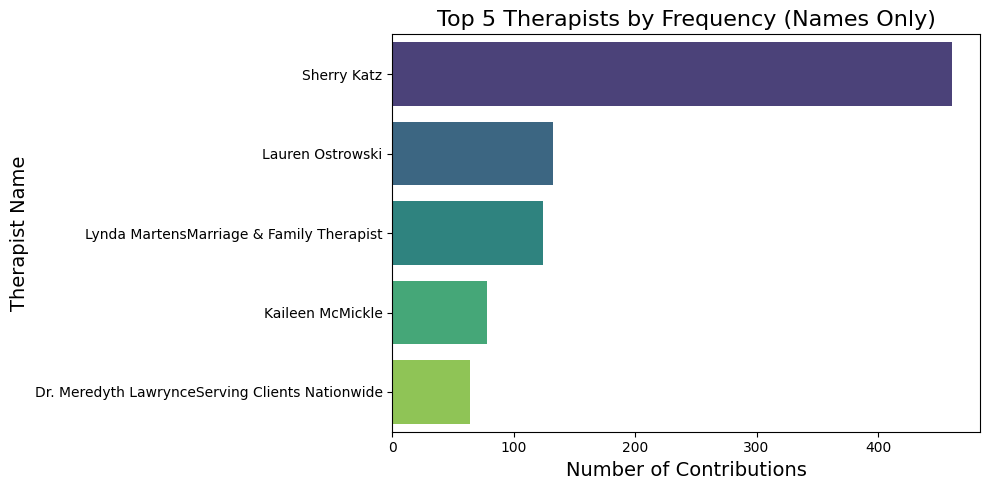

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Define a function to extract therapist names
def extract_name(info):
    # Assuming the name is the first part before any delimiter like ',' or '('
    match = re.match(r"^[^\(,]+", info.strip())
    return match.group(0) if match else info.strip()

# Apply the extraction function to the 'therapistInfo' column
counsel_chat_df["therapistName"] = counsel_chat_df["therapistInfo"].apply(extract_name)

# Count the frequency of each therapist's name
therapist_name_frequency = counsel_chat_df["therapistName"].value_counts()

# Display the top 10 therapists by frequency
top_therapist_names = therapist_name_frequency.head(5)
print("Top 10 Therapists by Frequency (Names Only):")
print(top_therapist_names)

# Plot the top 5 therapist names
plt.figure(figsize=(10, 5))
sns.barplot(x=top_therapist_names.values, y=top_therapist_names.index, palette="viridis")
plt.title("Top 5 Therapists by Frequency (Names Only)", fontsize=16)
plt.xlabel("Number of Contributions", fontsize=14)
plt.ylabel("Therapist Name", fontsize=14)
plt.tight_layout()
plt.show()


<ipython-input-88-45c5d20e9b93>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=counsel_chat_df, x="topic", y="answerLength", palette="Set3")


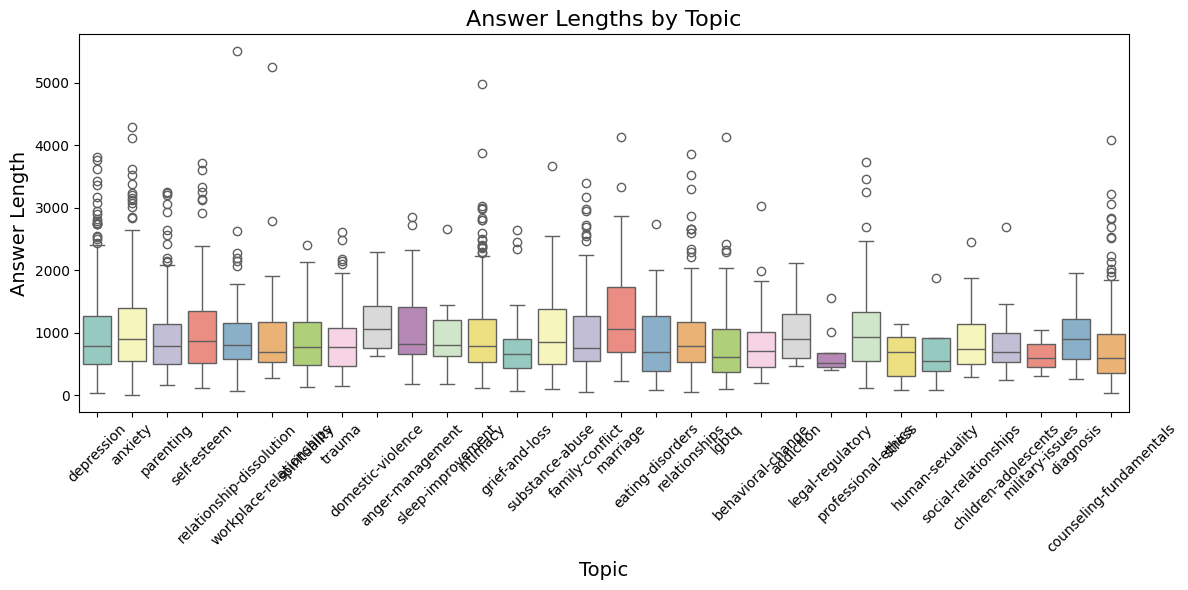

In [ ]:
# Box plot of answer lengths by topic
plt.figure(figsize=(12, 6))
sns.boxplot(data=counsel_chat_df, x="topic", y="answerLength", palette="Set3")
plt.xticks(rotation=45)
plt.title("Answer Lengths by Topic", fontsize=16)
plt.xlabel("Topic", fontsize=14)
plt.ylabel("Answer Length", fontsize=14)
plt.tight_layout()
plt.show()


## Implications:
* Topics like trauma, relationships, and grief-and-loss often have longer responses, which might
  reflect the complexity or sensitivity of these issues.
* Shorter answers for topics like legal-regulatory and counseling fundamentals suggest that these
  topics involve more fact-based or direct guidance rather than detailed discussions
* Topics such as relationships, grief-and-loss, and eating disorders exhibit many **outliers** with
  longer answers, which could indicate particularly detailed or nuanced responses for specific cases

Correlation Matrix:
                   views   upvotes  questionLength  answerLength
views           1.000000  0.438150        0.054892      0.112681
upvotes         0.438150  1.000000        0.133828      0.132583
questionLength  0.054892  0.133828        1.000000      0.093861
answerLength    0.112681  0.132583        0.093861      1.000000


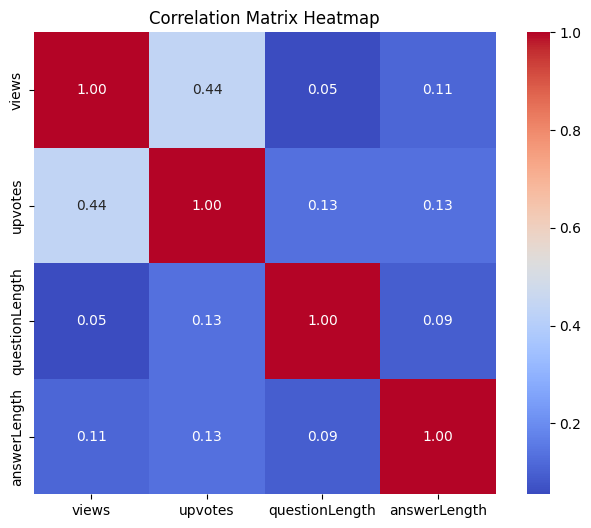

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_columns = ["views", "upvotes", "questionLength", "answerLength"]
correlation_matrix = counsel_chat_df[numeric_columns].corr()

# Displaying the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

## Implications:
* A moderate positive correlation indicates that posts with higher views tend to receive more
  upvotes. This suggests that popular content (high views) is often perceived as helpful (upvotes)
* A very weak positive correlation suggests that the length of the question has little influence on
  the length of the response. Counselors may provide detailed responses regardless of how detailed the question is
* The heatmap visualizes the correlation matrix using colors:
      Red Shades: Represent strong positive correlations (closer to 1.0).
      Blue Shades: Represent weak or no correlations (closer to 0.0).
      Diagonal Line: Always 1.0 because a variable is perfectly correlated with itself


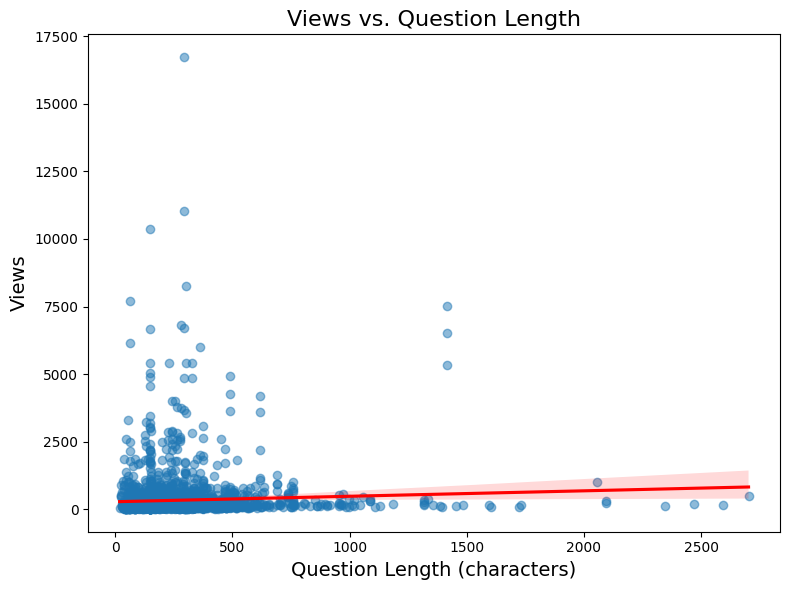

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with a regression line
plt.figure(figsize=(8, 6))
sns.regplot(data=counsel_chat_df, x="questionLength", y="views", scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.title("Views vs. Question Length", fontsize=16)
plt.xlabel("Question Length (characters)", fontsize=14)
plt.ylabel("Views", fontsize=14)
plt.tight_layout()
plt.show()


## Implications:
* Most data points are clustered around shorter questions (under ~500 characters), indicating that
  the majority of questions in the dataset are concise.
* Some outliers with very high views (~10,000–15,000) represent highly popular questions, but these
  do not appear strongly related to the length of the question
* The regression line (red) is nearly flat, suggesting a very weak positive relationship between
  question length and views.
* The shaded area around the regression line represents the confidence interval, which is wide,
  indicating high uncertainty in the relationship

## To implement the following:
  * Deciding on a numeric or categorical piece of information that you can infer or predict using  
    the dataset and build an ML model to predict this piece of information based on some input.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sentence_transformers import SentenceTransformer

# Step 1: Prepare the Data
# Ensure the dataset contains 'questionText' and 'topic'
counsel_chat_df = counsel_chat_df.dropna(subset=['questionText', 'topic'])
X = counsel_chat_df['questionText']
y = counsel_chat_df['topic']

# Step 2: Use Sentence-BERT for Embedding
model = SentenceTransformer('all-MiniLM-L6-v2')
X_embeddings = model.encode(X.tolist(), show_progress_bar=True)

# Step 3: Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_embeddings, y, test_size=0.2, random_state=42)

# Step 4: Train a Logistic Regression Classifier
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

# Step 5: Evaluate the Model
y_pred = classifier.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Define a Prediction Function
def predict_topic(new_question):
    """
    Predict the topic of a new question.
    """
    new_embedding = model.encode([new_question])
    predicted_topic = classifier.predict(new_embedding)[0]
    return predicted_topic



Batches:   0%|          | 0/82 [00:00<?, ?it/s]

Classification Report:
                          precision    recall  f1-score   support

               addiction       0.00      0.00      0.00         1
        anger-management       1.00      0.29      0.44         7
                 anxiety       0.73      0.82      0.77        76
       behavioral-change       0.75      0.23      0.35        13
    children-adolescents       0.00      0.00      0.00         3
 counseling-fundamentals       0.96      1.00      0.98        53
              depression       0.77      0.90      0.83        94
               diagnosis       1.00      0.50      0.67         4
       domestic-violence       0.00      0.00      0.00         2
        eating-disorders       1.00      1.00      1.00         2
         family-conflict       0.69      0.80      0.74        25
          grief-and-loss       1.00      0.50      0.67         4
         human-sexuality       0.00      0.00      0.00         1
                intimacy       0.59      0.74      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Example question for prediction
new_question = "How can I manage my anxiety in social situations?"

# Predict the topic
predicted_topic = predict_topic(new_question)

# Print the result
print(f"Predicted Topic: {predicted_topic}")


Predicted Topic: anxiety


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Step 1: Handle Class Imbalance with Class Weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weight_dict = dict(zip(np.unique(y_train), class_weights))

# Step 2: Use Class Weights in Logistic Regression
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=1000, class_weight=class_weight_dict)
classifier.fit(X_train, y_train)

# Evaluate the model
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
                          precision    recall  f1-score   support

               addiction       0.00      0.00      0.00         1
        anger-management       0.45      0.71      0.56         7
                 anxiety       0.85      0.62      0.72        76
       behavioral-change       0.57      0.62      0.59        13
    children-adolescents       1.00      1.00      1.00         3
 counseling-fundamentals       1.00      1.00      1.00        53
              depression       0.94      0.77      0.84        94
               diagnosis       1.00      1.00      1.00         4
       domestic-violence       0.00      0.00      0.00         2
        eating-disorders       0.67      1.00      0.80         2
         family-conflict       0.67      0.72      0.69        25
          grief-and-loss       0.75      0.75      0.75         4
         human-sexuality       0.00      0.00      0.00         1
                intimacy       0.74      0.53      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Example Usage
new_question = "I think I'm the best in the world!! Nobody can beat me!!"
predicted_topic = predict_topic(new_question)
print(f"Predicted sentiment of the question asked: {predicted_topic}")

Predicted sentiment of the question asked: self-esteem


In [ ]:
joblib.dump(classifier, "logistic_regression_model.pkl")
print("Model saved as 'logistic_regression_model.pkl'")

Model saved as 'logistic_regression_model.pkl'


In [ ]:
# Load the saved model
classifier = joblib.load("logistic_regression_model.pkl")

# Predict using the loaded model
new_question = "I cant quit smoking"
new_embedding = model.encode([new_question])  # Use the same Sentence-BERT model
predicted_topic = classifier.predict(new_embedding)[0]
print(f"Predicted Topic: {predicted_topic}")


Predicted Topic: substance-abuse


In [ ]:
# Save the trained Logistic Regression model to a .pkl file
joblib.dump(classifier, "logistic_regression_model.pkl")

# Code to download the saved file (specific to Google Colab)
from google.colab import files
files.download("logistic_regression_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Example Usage
new_question = "I feel like i might be harassed by my colleague"
predicted_topic = predict_topic(new_question)
print(f"Predicted sentiment of the question asked: {predicted_topic}")


Predicted sentiment of the question asked: workplace-relationships


In [ ]:
from sklearn.ensemble import RandomForestClassifier  # Add this line
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
# Generate new embeddings for the entire dataset
X_embeddings_new = model.encode(X.tolist(), show_progress_bar=True)

# Split the dataset into train and test sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_embeddings_new, y, test_size=0.2, random_state=42)

# Train the Random Forest classifier on the new embeddings
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
rf_classifier.fit(X_train_new, y_train_new)

# Evaluate the model
y_pred_new = rf_classifier.predict(X_test_new)
print("Classification Report:")
print(classification_report(y_test_new, y_pred_new))


Batches:   0%|          | 0/82 [00:00<?, ?it/s]

Classification Report:
                          precision    recall  f1-score   support

               addiction       0.00      0.00      0.00         1
        anger-management       1.00      0.29      0.44         7
                 anxiety       0.88      0.92      0.90        76
       behavioral-change       1.00      0.62      0.76        13
    children-adolescents       1.00      1.00      1.00         3
 counseling-fundamentals       1.00      1.00      1.00        53
              depression       0.80      0.96      0.87        94
               diagnosis       1.00      1.00      1.00         4
       domestic-violence       0.00      0.00      0.00         2
        eating-disorders       1.00      1.00      1.00         2
         family-conflict       0.85      0.88      0.86        25
          grief-and-loss       1.00      0.75      0.86         4
         human-sexuality       0.00      0.00      0.00         1
                intimacy       0.66      0.81      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Define a function for predicting the topic
def predict_topic_rf(new_question):
    """
    Predict the topic of a new question using the Random Forest Classifier.
    """
    # Use the updated Sentence-BERT model to encode the new question
    new_embedding = model.encode([new_question])

    # Predict the topic using the trained Random Forest model
    predicted_topic = rf_classifier.predict(new_embedding)[0]
    return predicted_topic

# Example question for prediction
new_question = "How can I improve my relationships with my family?"

# Predict the topic
predicted_topic = predict_topic_rf(new_question)

# Print the result
print(f"Predicted Topic: {predicted_topic}")


Predicted Topic: depression


In [ ]:
# Example question for prediction
new_question = "I cant quit smoking?"

# Predict the topic
predicted_topic = predict_topic_rf(new_question)

# Print the result
print(f"Predicted Topic: {predicted_topic}")


Predicted Topic: depression


In [ ]:
# Example question for prediction---using random_forest
new_question = "I think I'm the best in the world!! Nobody can beat me!!"

# Predict the topic
predicted_topic = predict_topic_rf(new_question)

# Print the result
print(f"Predicted Topic: {predicted_topic}")

Predicted Topic: anxiety


In [ ]:
# Example Usage for prediction using logistic regression
new_question = "I think I'm the best in the world!! Nobody can beat me!!"
predicted_topic = predict_topic(new_question)
print(f"Predicted sentiment of the question asked: {predicted_topic}")

Predicted sentiment of the question asked: self-esteem


In [ ]:
import joblib

# Save the trained Random Forest classifier
joblib.dump(rf_classifier, "random_forest_model.pkl")

print("Model saved successfully as random_forest_model.pkl")


Model saved successfully as random_forest_model.pkl


In [ ]:
from google.colab import files
files.download("random_forest_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib

# Load the saved Random Forest model
rf_classifier = joblib.load("random_forest_model.pkl")

# Use the loaded model for prediction
example_question_embedding = model.encode(["I cant quit smoking"])
predicted_topic = rf_classifier.predict(example_question_embedding)[0]

print(f"Predicted Topic: {predicted_topic}")


Predicted Topic: depression


In [ ]:
# Example Usage
new_question = "I think I'm the best in the world!! Nobody can beat me!!"
predicted_topic = predict_topic(new_question)
print(f"Predicted sentiment of the question asked: {predicted_topic}")

Predicted sentiment of the question asked: self-esteem


In [ ]:
pip install flask-ngrok

Drive already mounted at ./drive; to attempt to forcibly remount, call drive.mount("./drive", force_remount=True).


Model saved successfully in /content/drive/My Drive/data/random_forest_model.pkl


Predicted Topic: depression
